# Project 2 - Ames Housing Data and Kaggle Challenge

## Problem Statement:
Develop a regression model to predict the sale prices of houses in Ames, Iowa, using the provided dataset. The dataset includes various features of houses, such as their size, condition, age, neighborhood, and other attributes. The model's objective is to accurately predict the sale price based on these features, assisting potential buyers, sellers, and real estate agents in making informed decisions about property values in Ames. The model's performance will be evaluated based on its accuracy and ability to generalize to new, unseen data.

https://jse.amstat.org/v19n3/decock.pdf

## Background
The Ames Housing Dataset, compiled by Dean De Cock, serves as an educational alternative to the Boston Housing dataset, offering a more complex challenge for predictive modeling. It details the sale of residential properties in Ames, Iowa from 2006 to 2010, featuring an extensive set of 79 variables. These variables cover a broad range of aspects, both qualitative and quantitative, such as house size, age, room number, material quality, neighborhood, and other conditions and locations aspects. The primary goal with this dataset is to predict the final sale price of homes, making it highly suitable for regression analysis. Its complexity and richness in features make it a popular choice in educational settings for teaching advanced regression techniques, feature engineering, and data cleaning. Additionally, its real-world applicability makes it a valuable tool for data science professionals to develop and refine predictive modeling skills.

https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_ames_housing.html

https://uw-madison-datascience.github.io/high-dim-data-lesson/02-Intro-to-Ames-Housing-Dataset/index.html

## Data Description

The Ames Housing Dataset is a comprehensive collection of data on residential properties sold in Ames, Iowa, between 2006 and 2010.

1. **General Information**: The dataset includes a variety of information about each property, such as zoning classification, lot frontage, lot area, street and alley access types, and the general shape and contour of the land. It also provides details about utilities available, lot configuration, and the slope of the property.

2. **Neighborhood and Proximity**: It contains information about the neighborhood where each property is located and its proximity to various conditions like arterial streets, railroads, parks, etc.

3. **Physical Property Attributes**: The dataset covers detailed attributes of the properties, including the type of dwelling, style of the house, quality and condition ratings, year of construction, and information about any remodeling. It also includes specifics about the roof style and material, types of exterior coverings, masonry veneer type, quality of exterior materials, and the foundation type.

4. **Interior and Basement Features**: It provides extensive details about the interior of the houses, such as the height and condition of basements, types of heating and air conditioning systems, electrical system types, and the quality of kitchens. The dataset also includes information about the number and quality of fireplaces.

5. **Garage and Parking Spaces**: Details about the garage, including its type, finish, year of construction, and capacity, are included.

6. **Outdoor Features and Other Amenities**: Information about outdoor features like pool area and the value of miscellaneous features are also part of the dataset.

7. **Sale Information**: The most crucial aspect for predictive modeling – the sale price of the property – is included as the target variable. This data is accompanied by details about the month and year of sale, the type and condition of the sale.

8. **Feature Engineering Opportunities**: The dataset allows for extensive feature engineering, such as combining or transforming existing features to better capture the essence of the data. For instance, basement features, porch attributes, and the overall condition of the house can be restructured for more effective analysis.

9. **Handling Missing and Erroneous Data**: The dataset contains some missing values and occasionally misspelled or incorrectly recorded data, which requires careful preprocessing and cleaning.

10. **Modeling and Analysis**: Various models, including linear regression and tree-based models, have been used to analyze this dataset, focusing on key features that significantly impact house prices, such as the overall quality, size, remodeling year, and neighborhood type.

https://nycdatascience.com/blog/student-works/data-analysis-on-the-ames-housing-dataset/

### Initial Import

In [1]:
# Let's import the necessary librairies.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

%matplotlib inline

### Import the dataset

In [2]:
df = pd.read_csv('/Users/seydoutoure/Desktop/ga_dsi/project_2/datasets/train.csv')
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [4]:
df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


These statistics give us an understanding of the distribution and spread of each feature, which are essential for data analysis and model building. For example, looking at the 'SalePrice' row, we can see that the average sale price of a house in the dataset is approximately $181,469.

In [5]:
# Identifying missing values
missing_data = df.isnull().sum()

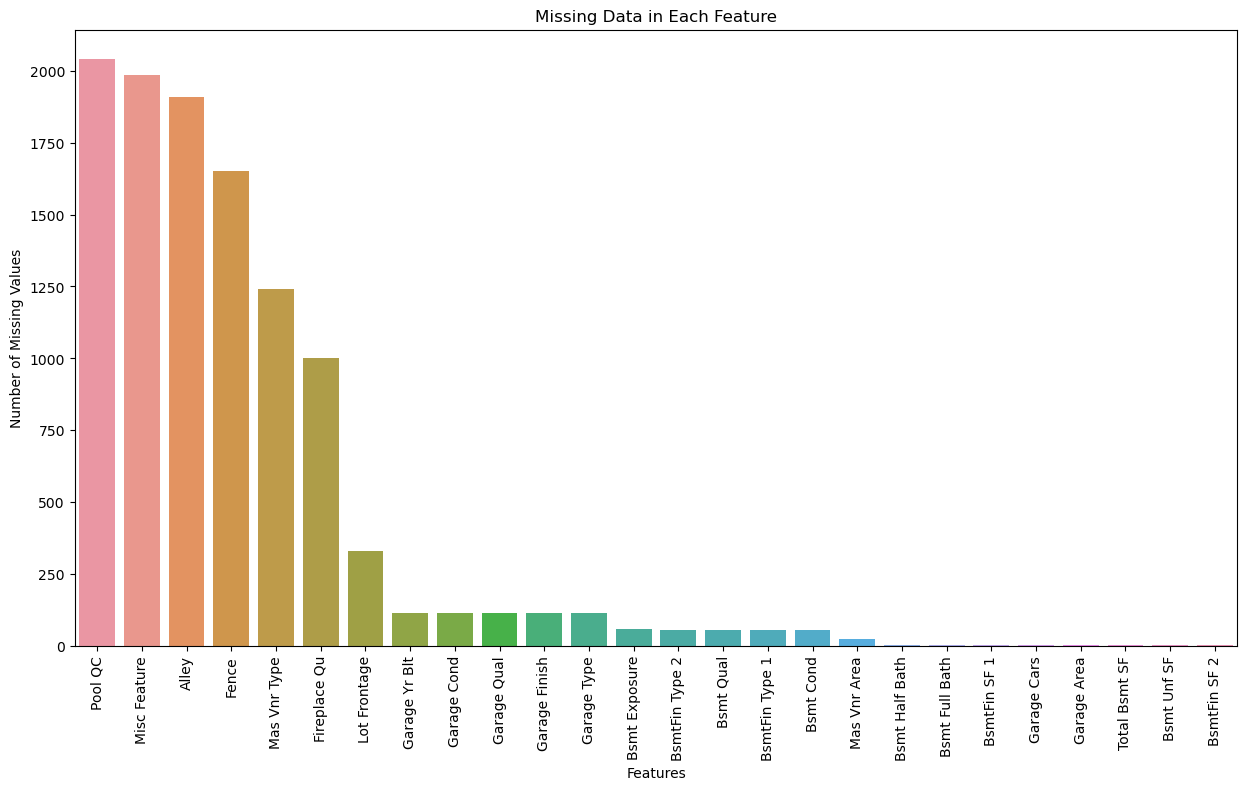

In [6]:
#The Ames housing dataset has significant amount of missing values, so I decided to plot them.
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

# Plotting missing data
plt.figure(figsize=(15, 8))
sns.barplot(x=missing_data.index, y=missing_data)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.title('Missing Data in Each Feature')
plt.show()

In [7]:
# Since 'Alley', 'Pool QC', 'Misc Feature' columns have significant amout of null value, we can proceed 
# to drop them 
df.drop(df[['Alley', 'Pool QC', 'Misc Feature', 'Fence']], axis=1, inplace=True)

In [8]:
df[['Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 
            'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']].fillna('Unknown', inplace=True)


/var/folders/77/bg6x1ybs7qncw47sj206qxt00000gn/T/ipykernel_13148/3190623187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']].fillna('Unknown', inplace=True)


In [9]:
num_df = df.select_dtypes(include=['int64', 'float64']).columns
num_df

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [10]:
median_values = df[num_df].median()

In [11]:
df[num_df] = df[num_df].fillna(median_values)

In [12]:
df.isnull().sum()

Id              0
PID             0
MS SubClass     0
MS Zoning       0
Lot Frontage    0
               ..
Misc Val        0
Mo Sold         0
Yr Sold         0
Sale Type       0
SalePrice       0
Length: 77, dtype: int64

In [13]:
num_df = pd.DataFrame(num_df)

In [14]:
df.isnull().sum()

Id              0
PID             0
MS SubClass     0
MS Zoning       0
Lot Frontage    0
               ..
Misc Val        0
Mo Sold         0
Yr Sold         0
Sale Type       0
SalePrice       0
Length: 77, dtype: int64

## Visulization

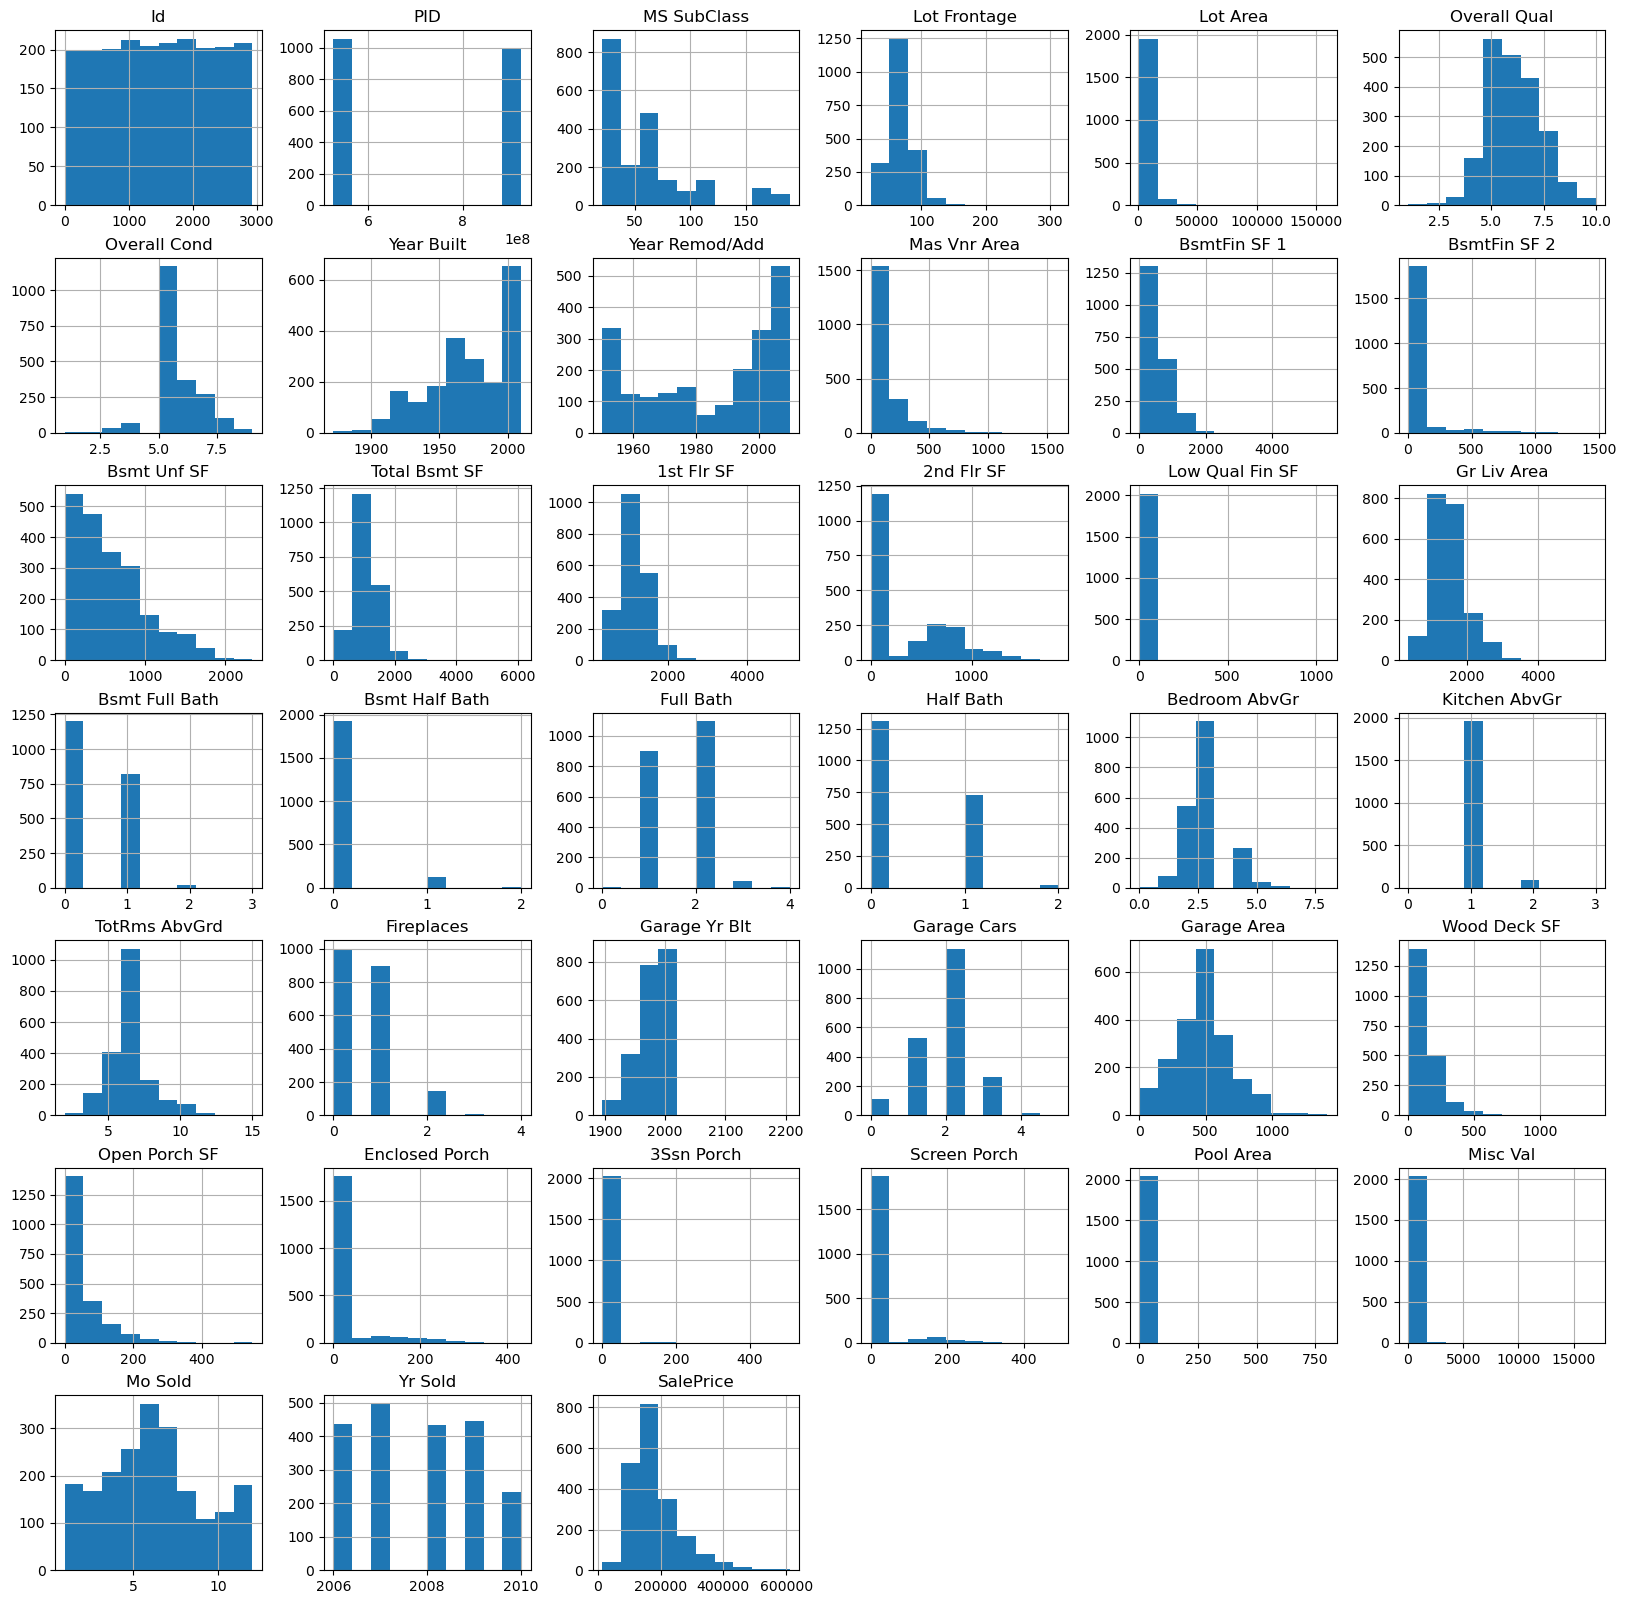

In [15]:
df.hist(figsize=(20, 20));

Together, these histograms provide a comprehensive view of the physical characteristics of the properties, their conditions, the timing of sales, and the sale prices, which are all valuable for understanding the housing market dynamics in Ames, Iowa, during the period covered by the dataset.

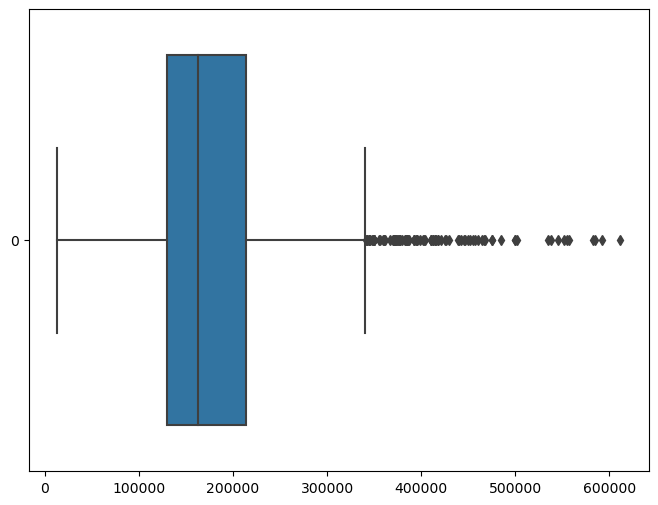

In [16]:
# Set the aesthetic style of the plots

plt.figure(figsize=(8, 6))

sns.boxplot(df['SalePrice'], orient = 'h');

<Axes: xlabel='Year Built', ylabel='SalePrice'>

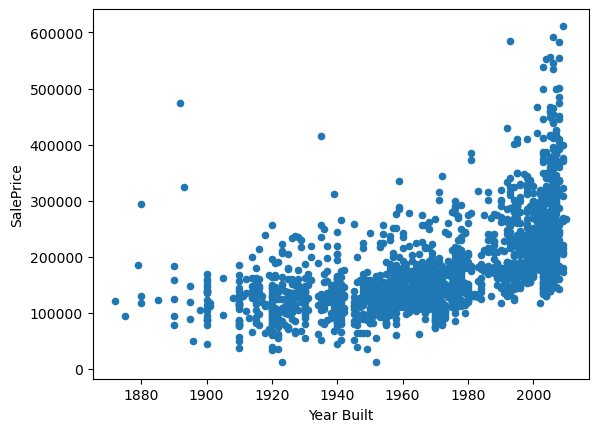

In [84]:
df.plot(kind='scatter', y='SalePrice', x='Year Built')

This scatter plot shows how the house prices increased in years

In [18]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Id,1.000000,0.175793,0.026543,-0.022972,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.035808,...,-0.009045,0.001382,0.033747,-0.022791,0.009758,0.055696,-0.012683,0.127723,-0.975747,-0.051398
PID,0.175793,1.000000,-0.003632,-0.083236,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.242482,...,-0.041221,-0.081129,0.150179,-0.024679,-0.042030,0.005825,0.004223,-0.032735,0.008476,-0.255052
MS SubClass,0.026543,-0.003632,1.000000,-0.363835,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.002763,...,0.001622,-0.020289,-0.039842,-0.030088,-0.038819,-0.004585,-0.027485,0.013027,-0.032870,-0.087335
Lot Frontage,-0.022972,-0.083236,-0.363835,1.000000,0.386708,0.182361,-0.049780,0.103534,0.079909,0.197858,...,0.100071,0.169950,-0.002764,0.028342,0.067850,0.141315,0.048216,-0.015915,0.008450,0.325129
Lot Area,0.032872,0.024135,-0.245484,0.386708,1.000000,0.105824,-0.019185,0.036002,0.050771,0.167520,...,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566
Overall Qual,-0.061483,-0.265863,0.035763,0.182361,0.105824,1.000000,-0.082770,0.602964,0.584654,0.430041,...,0.257081,0.308855,-0.154554,0.031938,0.048752,0.006558,0.022099,0.019242,-0.011578,0.800207
Overall Cond,-0.026096,0.106861,-0.070141,-0.049780,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.131908,...,0.011034,-0.052266,0.108320,0.026907,0.047359,-0.005806,0.014269,-0.003144,0.047664,-0.097019
Year Built,-0.064444,-0.347039,0.035983,0.103534,0.036002,0.602964,-0.370988,1.000000,0.629116,0.320780,...,0.216339,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.000626,-0.007083,-0.003559,0.571849
Year Remod/Add,-0.090040,-0.176666,0.044836,0.079909,0.050771,0.584654,0.042614,0.629116,1.000000,0.204234,...,0.216271,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370
Mas Vnr Area,-0.035808,-0.242482,-0.002763,0.197858,0.167520,0.430041,-0.131908,0.320780,0.204234,1.000000,...,0.164006,0.157836,-0.105934,0.011771,0.088207,0.012789,0.079630,-0.003915,-0.017324,0.503579


This correlation matrix is a numerical representation of the correlation coefficients between different variables in the Ames Housing Dataset. Each cell shows the correlation between two variables, with a range from -1 to 1. A value closer to 1 indicates a strong positive correlation, meaning as one variable increases, the other tends to increase as well. A value closer to -1 indicates a strong negative correlation, where one variable's increase is associated with the decrease of the other. A value near 0 suggests no linear relationship.

For instance:
- **SalePrice** and **Overall Qual** have a high positive correlation of 0.800207, suggesting that as the overall quality of the house increases, the sale price tends to increase.
- **SalePrice** and **PID** have a negative correlation of -0.255052, which might indicate that as PID (a categorical identifier for parcels) increases, the sale price slightly decreases.
- Year variables (**Year Built** and **Year Remod/Add**) show a strong positive correlation with **SalePrice**, indicating newer or more recently remodeled houses tend to have higher sale prices.

The diagonal of the matrix, which would show the correlation of each variable with itself, is always 1, as any variable is perfectly correlated with itself. This matrix is a crucial tool for identifying relationships between variables and is particularly useful in feature selection for predictive modeling.

In [19]:
df.corr(numeric_only = True)['SalePrice'].sort_values()

PID               -0.255052
Enclosed Porch    -0.135656
Kitchen AbvGr     -0.125444
Overall Cond      -0.097019
MS SubClass       -0.087335
Id                -0.051398
Bsmt Half Bath    -0.045290
Low Qual Fin SF   -0.041594
Yr Sold           -0.015203
Misc Val          -0.007375
BsmtFin SF 2       0.016432
Pool Area          0.023106
Mo Sold            0.032735
3Ssn Porch         0.048732
Screen Porch       0.134581
Bedroom AbvGr      0.137067
Bsmt Unf SF        0.190262
2nd Flr SF         0.248452
Half Bath          0.283001
Bsmt Full Bath     0.283332
Lot Area           0.296566
Lot Frontage       0.325129
Wood Deck SF       0.326490
Open Porch SF      0.333476
BsmtFin SF 1       0.423445
Fireplaces         0.471093
Mas Vnr Area       0.503579
TotRms AbvGrd      0.504014
Garage Yr Blt      0.513936
Full Bath          0.537969
Year Remod/Add     0.550370
Year Built         0.571849
1st Flr SF         0.618486
Total Bsmt SF      0.628754
Garage Cars        0.648128
Garage Area        0

In [20]:
dummies_df = pd.get_dummies(df[['Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 
                                   'BsmtFin Type 2', 'Garage Type', 'Garage Finish', 'Garage Qual', 
                                   'Garage Cond']]).astype(int)


In [21]:
X = dummies_df
y = df['SalePrice']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [23]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)

X_test = ss.transform(X_test)

In [24]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [25]:
X.isnull().sum()

Mas Vnr Type_BrkCmn     0
Mas Vnr Type_BrkFace    0
Mas Vnr Type_Stone      0
Bsmt Qual_Ex            0
Bsmt Qual_Fa            0
Bsmt Qual_Gd            0
Bsmt Qual_Po            0
Bsmt Qual_TA            0
Bsmt Cond_Ex            0
Bsmt Cond_Fa            0
Bsmt Cond_Gd            0
Bsmt Cond_Po            0
Bsmt Cond_TA            0
Bsmt Exposure_Av        0
Bsmt Exposure_Gd        0
Bsmt Exposure_Mn        0
Bsmt Exposure_No        0
BsmtFin Type 1_ALQ      0
BsmtFin Type 1_BLQ      0
BsmtFin Type 1_GLQ      0
BsmtFin Type 1_LwQ      0
BsmtFin Type 1_Rec      0
BsmtFin Type 1_Unf      0
BsmtFin Type 2_ALQ      0
BsmtFin Type 2_BLQ      0
BsmtFin Type 2_GLQ      0
BsmtFin Type 2_LwQ      0
BsmtFin Type 2_Rec      0
BsmtFin Type 2_Unf      0
Garage Type_2Types      0
Garage Type_Attchd      0
Garage Type_Basment     0
Garage Type_BuiltIn     0
Garage Type_CarPort     0
Garage Type_Detchd      0
Garage Finish_Fin       0
Garage Finish_RFn       0
Garage Finish_Unf       0
Garage Qual_

In [26]:
predictions = lr.predict(X_train)
predictions

array([213384.17825701, 201608.17825701, 240520.17825701, ...,
       184712.17825701, 128392.17825701, 219656.17825701])

In [27]:
test_df = pd.read_csv('/Users/seydoutoure/Desktop/ga_dsi/project_2/datasets/test.csv')
test_df

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,11,2007,WD
874,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
875,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2008,WD
876,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdWo,NaN,0,5,2007,WD


In [28]:
test_df.shape

(878, 80)

In [29]:
test_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [47]:
# Since 'Alley', 'Pool QC', 'Misc Feature' columns have significant amout of null value, we can proceed to drop them 
test_df.drop(test_df[['Alley', 'Pool QC', 'Misc Feature', 'Fence']], axis=1, inplace=True)

In [48]:
test_df[['Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 
            'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']].fillna('Unknown', inplace=True)


/var/folders/77/bg6x1ybs7qncw47sj206qxt00000gn/T/ipykernel_13148/1437627380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']].fillna('Unknown', inplace=True)


In [49]:
num_test_df = test_df.select_dtypes(include=['int64', 'float64']).columns
num_test_df

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')

In [50]:
test_median_values = test_df[num_test_df].median()

In [51]:
test_df[num_test_df] = test_df[num_test_df].fillna(median_values)

In [52]:
num_test_df.isnull().sum()

0

In [53]:
dummies_test_df = pd.get_dummies(test_df[['Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 
     'BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Type', 
     'Garage Finish', 'Garage Qual', 'Garage Cond']]).astype(int)


In [54]:
# Add missing dummy columns from training set to test set
for col in dummies_df.columns:
    if col not in (dummies_test_df).columns:
        dummies_test_df[col] = 0

# Align the order of columns in test set to match the training set
dummies_test_df = (dummies_test_df)[dummies_df.columns]


In [55]:
test_df_scaled = ss.transform(dummies_test_df)

In [56]:
predictions_2 = lr.predict(test_df_scaled)
predictions_2

array([ 6.34731819e+04,  1.85992178e+05,  2.08264178e+05,  1.16488178e+05,
        1.88424178e+05,  1.36712178e+05,  1.20328178e+05,  1.56808178e+05,
        1.79080178e+05,  1.34408178e+05,  2.03912178e+05,  1.20328178e+05,
        1.41832178e+05,  3.43688178e+05,  1.16488178e+05,  1.57576178e+05,
        1.16360178e+05,  1.36712178e+05,  1.65512178e+05,  1.37864178e+05,
        1.50024178e+05,  1.45032178e+05,  2.12232178e+05,  1.82024178e+05,
        1.57576178e+05,  1.33256178e+05,  1.52840178e+05,  9.11211819e+04,
        2.25288178e+05,  9.13771819e+04,  1.30696178e+05,  1.16360178e+05,
        1.31336178e+05,  1.59624178e+05,  2.25544178e+05,  2.25672178e+05,
        1.04177182e+05,  1.14056178e+05,  1.44392178e+05,  1.41960178e+05,
        1.81512178e+05,  1.85992178e+05,  1.15208178e+05,  7.59121783e+04,
        2.26440178e+05,  9.08651819e+04,  2.25544178e+05,  1.16360178e+05,
        1.58088178e+05,  1.74728178e+05,  9.31691819e+04,  1.13928178e+05,
        2.03016178e+05,  

In [57]:
k_sub = pd.DataFrame([predictions_2]).T
k_sub

,0
0,63473.181887
1,185992.178257
2,208264.178257
3,116488.178257
4,188424.178257
...,...
873,155912.178257
874,166664.178257
875,141576.178257
876,130696.178257


In [58]:
k_sub.shape

(878, 1)

In [59]:
submission = pd.DataFrame({'Id': test_df['Id']})
submission = predictions_2
submission

array([ 6.34731819e+04,  1.85992178e+05,  2.08264178e+05,  1.16488178e+05,
        1.88424178e+05,  1.36712178e+05,  1.20328178e+05,  1.56808178e+05,
        1.79080178e+05,  1.34408178e+05,  2.03912178e+05,  1.20328178e+05,
        1.41832178e+05,  3.43688178e+05,  1.16488178e+05,  1.57576178e+05,
        1.16360178e+05,  1.36712178e+05,  1.65512178e+05,  1.37864178e+05,
        1.50024178e+05,  1.45032178e+05,  2.12232178e+05,  1.82024178e+05,
        1.57576178e+05,  1.33256178e+05,  1.52840178e+05,  9.11211819e+04,
        2.25288178e+05,  9.13771819e+04,  1.30696178e+05,  1.16360178e+05,
        1.31336178e+05,  1.59624178e+05,  2.25544178e+05,  2.25672178e+05,
        1.04177182e+05,  1.14056178e+05,  1.44392178e+05,  1.41960178e+05,
        1.81512178e+05,  1.85992178e+05,  1.15208178e+05,  7.59121783e+04,
        2.26440178e+05,  9.08651819e+04,  2.25544178e+05,  1.16360178e+05,
        1.58088178e+05,  1.74728178e+05,  9.31691819e+04,  1.13928178e+05,
        2.03016178e+05,  

In [60]:
submission_1 = pd.DataFrame(submission, columns=['Saleprice'])
submission_1 = submission_1.set_index(test_df['Id'])


In [61]:
submission_1

,Saleprice
Id,
2658,63473.181887
2718,185992.178257
2414,208264.178257
1989,116488.178257
625,188424.178257
...,...
1662,155912.178257
1234,166664.178257
1373,141576.178257


In [62]:
submission_1.to_csv('datasets/predict_sale_2.csv')

In [63]:
kaggle = pd.read_csv('datasets/predict_sale.csv')
kaggle

,Id,Saleprice
0,2658,6.097138e+18
1,2718,6.991241e+18
2,2414,4.700942e+18
3,1989,3.440530e+18
4,625,4.954647e+18
...,...,...
873,1662,6.084004e+18
874,1234,6.411126e+18
875,1373,4.304216e+18
876,1672,3.070886e+18


In [64]:
# Let's determine r2.
score = lr.score(X_train, y_train)
score

0.6322842447103614

This r2 means that about 63% of the variance in the dependent variable (y_train) can be explained by the independent variable (X_train) in the model.

In [65]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, predictions)

In [66]:
rmse = np.sqrt(mse)
rmse

48371.635427641006

This RMSE means that, on average, the predictions of your model are about 48,371.63 units away from the actual values.
The lower the RMSE, the better a model is at predicting values. So, in general, a lower RMSE is desirable.

In [67]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso()

ridge = Ridge()

In [82]:
cross_val_score(lr, X_train, y_train, cv = 5).mean()

-3.86451389956369e+26

In [69]:
cross_val_score(lasso, X_train, y_train, cv = 5).mean()

/Users/seydoutoure/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.618e+11, tolerance: 8.239e+08
  model = cd_fast.enet_coordinate_descent(
/Users/seydoutoure/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.476e+11, tolerance: 8.513e+08
  model = cd_fast.enet_coordinate_descent(
/Users/seydoutoure/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

0.5952268789418517

This score is a measure of how well the unseen data points are likely to be predicted by the model. A value of 0.595 indicates a moderate level of predictive accuracy.

In [70]:
cross_val_score(ridge, X_train, y_train, cv = 5).mean()

0.5954907985346138

This score suggests a moderate level of predictive accuracy for the model. It indicates the model's capability to generalize its predictions to new data points based on the training data it has seen.

In [71]:
lasso.fit(X_train, y_train)

/Users/seydoutoure/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.980e+11, tolerance: 1.044e+09
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [72]:
lasso.score(X_train, y_train)

0.6375367824520457

This means that about 63.8% of the variance in the dependent variable (y_train) can be explained by the independent variables (X_train) in the Lasso regression model.
The score reflects a moderate level of fit between the model and the training data.

In [83]:
lasso.score(X_test, y_test)

0.6424808010365022

This means that about 64.25% of the variance in the dependent variable (y_test) can be explained by the model.
An R-squared of 0.6425 indicates a moderate to good predictive accuracy of the model on the test dataset.

In [74]:
lasso.coef_

array([-1.30944427e+03,  7.84235076e+03,  7.29696190e+03,  4.00269889e+04,
        1.25773269e+03,  2.24980674e+04, -2.40148858e+02,  8.84599568e+03,
        4.46208636e+03,  1.21730155e+04,  1.64370544e+04,  3.57539352e+03,
        2.17163568e+04, -5.27438779e+03,  4.84514910e+03, -2.38479146e+03,
       -8.29854294e+03,  3.31694686e+03,  1.22765183e+03,  1.16773189e+04,
        1.69225062e+03,  1.31535869e+03,  4.42029697e+03, -6.95108089e+03,
       -1.05020734e+04, -3.24020504e+03, -1.03371532e+04, -1.18390583e+04,
       -2.17886476e+04,  1.24935008e+03,  9.51721636e+03, -3.82753628e+03,
        9.83048569e+03, -1.39714864e+03,  1.92125367e+01,  8.69603603e+03,
        5.60421305e+03, -2.27372729e+01,  1.52050797e+04,  1.32544202e+03,
        7.85976598e+03, -4.85716746e+02,  3.92766707e+03, -1.16157223e+04,
       -1.69411690e+02, -5.41386777e+02, -5.26708860e+02,  4.63472051e+03])

In [75]:
lasso.intercept_

181718.5274390244

This means when all the independent variables (features) in your model are zero, the predicted value of the dependent variable would be approximately 181,718.53.
This intercept of the Lasso model is a significant part of the model's equation, representing the expected value of the dependent variable when all independent variables are zero. 

In [76]:
ridge.fit(X_train, y_train)

Ridge()

In [77]:
ridge.score(X_train, y_train)

0.6374816659366185

An R-squared value of approximately 0.6375 means that about 63.75% of the variance in the dependent variable (y_train) can be explained by the independent variables (X_train) in the Ridge regression model.
This indicates a moderate level of fit between the model and the training data, suggesting that the model is capturing a significant portion of the available information in the data.

In [78]:
ridge.coef_

array([ -1310.95183817,   7862.61373791,   7301.78928625,  33131.20438113,
        -2803.42658114,  10567.51109468,   -835.45051494,  -3095.35439306,
         4441.68318282,  12092.83046154,  16338.96793593,   3550.86599595,
        21584.35438886,  -3986.98772833,   5939.27452419,  -1396.47557637,
        -6532.51637914,   4669.60075392,   2391.66417682,  13515.12483023,
         2526.5976593 ,   2446.92255414,   6227.91697803,  -4870.23264074,
        -7996.82613132,  -1504.91845588,  -7475.1567053 ,  -8764.06714037,
       -15989.07024716,    495.13461555,   5645.43427175,  -4672.93057478,
         7912.23723077,  -1914.50859489,  -3426.00895456,   6194.38571066,
         2990.7144232 ,  -2879.2091116 ,  15082.01525872,    932.87306891,
         7663.08061514,   -553.66843162,   3312.73500345, -11029.97886512,
         2094.512912  ,    612.1793068 ,    561.4978054 ,   9111.50537431])

**Positive Coefficients**: A positive value indicates that as the independent variable increases, the dependent variable also tends to increase. For instance, a coefficient of 7862.61373791 suggests that for every unit increase in this particular independent variable, the dependent variable increases by approximately 7862.61 units, all else being equal.

**Negative Coefficients**: Conversely, a negative coefficient (like -1310.95183817) indicates an inverse relationship, where the dependent variable decreases as the independent variable increases.

In [79]:
ridge.intercept_

181718.5274390244

When all the independent variables in the model are zero, the predicted value of the dependent variable would be approximately 181,718.53.

In [80]:
lr.coef_

array([-1.29407348e+03,  6.11409488e+03,  5.74310019e+03, -6.79768076e+16,
       -4.02347390e+16, -1.18065221e+17, -5.89248540e+15, -1.18149882e+17,
        5.84481336e+16,  2.39669407e+17,  2.87548331e+17,  7.54101077e+16,
        4.24418667e+17, -7.22865969e+03,  1.93278242e+03, -3.94563644e+03,
       -1.10529045e+04, -3.88477914e+17, -3.34097284e+17, -5.22097873e+17,
       -2.38848053e+17, -3.24510542e+17, -5.14056802e+17, -6.78569856e+03,
       -1.04376707e+04, -2.79083192e+03, -9.54110668e+03, -1.13643144e+04,
       -2.06126489e+04,  4.62237184e+16,  2.37688261e+17,  5.19590108e+16,
        1.17265651e+17,  3.16544432e+16,  2.11433511e+17,  9.04336686e+17,
        9.51010248e+17,  1.03303513e+18, -5.56686864e+15, -2.59720801e+16,
       -1.28049831e+16, -4.54671731e+15, -4.09204558e+16, -8.57094315e+16,
       -3.54918150e+17, -1.81428247e+17, -1.71104621e+17, -7.01528371e+17])

These coefficients are very large which is unusual, this could be due to an issue with the model.

In [81]:
lr.intercept_

181383.1695274537

This means that when all independent variables are zero, the predicted value of the dependent variable is approximately 181,383.17.

## Conclusion and Recommendations

**Conclusion:**

The coefficients and intercept obtained from the linear regression model trained on the Ames Housing Dataset provide valuable insights into the relationships between the independent variables and the predicted sale prices of houses. However, there are some important observations and considerations to be made based on the provided coefficients and intercept:

- **Large Coefficients**: The coefficients for some independent variables are extremely large (e.g., in the order of \(10^{16}\)), which suggests potential issues with the model or the data. Such large coefficients are not typical in linear regression and may indicate problems like multicollinearity or feature scaling issues.

- **Intercept**: The intercept of approximately $181,383.17 represents the baseline sale price when all independent variables are zero. However, in a real-world context, it may not make sense for all variables to be zero, which questions the practicality of this interpretation.

- **Model Quality**: The large coefficients and potential outliers in the data may affect the overall quality and reliability of the linear regression model. Further analysis is needed to assess the model's performance and its ability to make accurate predictions.

**Recommendation:**

1. **Data Inspection and Cleaning**: Thoroughly inspect and clean the dataset to address potential issues such as multicollinearity, outliers, and missing values. Ensure that all variables are on a reasonable scale and are suitable for linear regression.

2. **Feature Selection**: Perform feature selection to identify and retain only the most relevant independent variables for the model. This can help reduce the complexity and potential issues with the model.

3. **Regularization**: Consider using regularization techniques such as Ridge or Lasso regression to mitigate the impact of large coefficients and improve model stability. Regularization can also help with feature selection.

4. **Model Evaluation**: Assess the model's performance using appropriate evaluation metrics such as mean squared error (MSE), R-squared, and cross-validation. This will provide a clearer picture of how well the model predicts house sale prices.

5. **Contextual Analysis**: Given that the dataset represents real estate data, consider conducting a domain-specific analysis to better understand the relationships between the independent variables and sale prices. This can provide insights into which features are most important in this context.

6. **Further Data Exploration**: Explore the dataset further to identify any potential interactions or nonlinear relationships between variables that may not be captured by a simple linear regression model.

In summary, while linear regression is a powerful modeling technique, it's essential to address the issues related to the coefficients and intercept, clean and preprocess the data, and evaluate the model rigorously to ensure its reliability and usefulness for predicting house sale prices in the Ames Housing dataset.